# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler


from sklearn import metrics #untuk mengukur performa model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Dataset

In [ ]:
df = pd.read_csv('Cacar Monyet.csv')
df.head()

,iso_code,continent,location,date,total_cases,reproduction_rate,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,BHR,Asia,Bahrain,1/1/2022,282062.0,2.04,5477.0,540.0,0.037,30.18,...,37.6,NaN,2.0,77.29,0.852,1472237,NaN,NaN,NaN,NaN
1,BHR,Asia,Bahrain,1/2/2022,282677.0,2.02,4833.0,484.0,0.033,30.17,...,37.6,NaN,2.0,77.29,0.852,1472237,NaN,NaN,NaN,NaN
2,BHR,Asia,Bahrain,1/3/2022,283344.0,2.02,4571.0,471.0,0.032,30.16,...,37.6,NaN,2.0,77.29,0.852,1472237,NaN,NaN,NaN,NaN
3,BHR,Asia,Bahrain,1/4/2022,284224.0,2.00,4276.0,447.0,0.030,30.16,...,37.6,NaN,2.0,77.29,0.852,1472237,NaN,NaN,NaN,NaN
4,BHR,Asia,Bahrain,1/5/2022,285448.0,1.96,4094.0,439.0,0.030,30.15,...,37.6,NaN,2.0,77.29,0.852,1472237,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    5913 non-null   object 
 1   continent                                   5913 non-null   object 
 2   location                                    5913 non-null   object 
 3   date                                        5913 non-null   object 
 4   total_cases                                 5904 non-null   float64
 5   reproduction_rate                           3504 non-null   float64
 6   new_vaccinations_smoothed_per_million       4048 non-null   float64
 7   new_people_vaccinated_smoothed              4144 non-null   float64
 8   new_people_vaccinated_smoothed_per_hundred  4144 non-null   float64
 9   stringency_index                            3456 non-null   float64
 10  population_d

In [ ]:
df.describe()

,total_cases,reproduction_rate,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,median_age,aged_65_older,aged_70_older,extreme_poverty,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative,excess_mortality
count,5.904000e+03,3504.000000,4048.000000,4.144000e+03,4144.000000,3456.000000,5913.000000,5913.000000,5913.000000,3945.000000,...,5913.000000,5667.000000,5667.000000,1974.000000,5913.000000,5913.000000,5913.000000,5.913000e+03,83.000000,83.000000
mean,8.332957e+06,0.927220,1395.639328,4.732067e+04,0.025666,33.740596,32.610807,7.934148,4.826718,4.871255,...,10.218072,5.771625,38.665431,66.972620,2.852572,76.145500,0.779504,1.748975e+08,11.463735,8.842169
std,1.586780e+07,0.453329,2076.160764,2.624031e+05,0.066649,18.439502,6.412621,5.525466,3.754354,7.457627,...,4.077679,6.194792,11.908270,15.105449,3.114385,4.686168,0.103759,3.844707e+08,8.606431,13.542827
min,1.120830e+05,-0.030000,0.000000,0.000000e+00,0.000000,0.000000,23.200000,1.144000,0.526000,0.100000,...,4.000000,0.300000,20.600000,47.782000,0.300000,67.270000,0.557000,1.472237e+06,1.350000,-14.930000
25%,9.776225e+05,0.690000,96.000000,2.080000e+02,0.001000,17.590000,28.200000,4.495000,2.661000,0.200000,...,7.040000,1.200000,28.300000,59.550000,1.200000,71.720000,0.718000,9.441138e+06,6.880000,1.335000
50%,2.122382e+06,0.900000,493.000000,1.417000e+03,0.005000,32.160000,31.900000,5.989000,3.414000,0.700000,...,9.740000,2.800000,37.800000,59.607000,2.000000,76.680000,0.782000,3.640882e+07,8.060000,6.300000
75%,6.858644e+06,1.130000,1762.500000,1.125425e+04,0.019000,43.702500,34.100000,10.641000,5.929000,5.700000,...,12.710000,7.800000,42.400000,78.463000,2.810000,77.970000,0.852000,1.155590e+08,9.300000,11.770000
max,9.930656e+07,4.080000,18574.000000,5.505539e+06,0.911000,79.170000,48.200000,27.049000,18.493000,22.700000,...,17.720000,26.900000,76.100000,90.670000,13.050000,84.630000,0.938000,1.425887e+09,31.810000,68.440000


In [ ]:
#Missing Value persentase
round(df.isnull().sum()/df.shape[0]*100, 2)

iso_code                                       0.00
continent                                      0.00
location                                       0.00
date                                           0.00
total_cases                                    0.15
reproduction_rate                             40.74
new_vaccinations_smoothed_per_million         31.54
new_people_vaccinated_smoothed                29.92
new_people_vaccinated_smoothed_per_hundred    29.92
stringency_index                              41.55
population_density                             0.00
median_age                                     0.00
aged_65_older                                  0.00
aged_70_older                                  0.00
gdp_per_capita                                 0.00
extreme_poverty                               33.28
cardiovasc_death_rate                          0.00
diabetes_prevalence                            0.00
female_smokers                                 4.16
male_smokers

In [ ]:
df = df.drop(['continent', 'date','reproduction_rate','population_density',
              'stringency_index','extreme_poverty','handwashing_facilities',
              'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
              'excess_mortality', 'excess_mortality_cumulative_per_million'],axis=1)

In [ ]:
#drop missingvalue
df = df.dropna(subset=['total_cases','female_smokers','male_smokers'])

In [ ]:
round(df.isnull().sum()/df.shape[0]*100, 2)

iso_code                                       0.00
location                                       0.00
total_cases                                    0.00
new_vaccinations_smoothed_per_million         30.29
new_people_vaccinated_smoothed                28.60
new_people_vaccinated_smoothed_per_hundred    28.60
median_age                                     0.00
aged_65_older                                  0.00
aged_70_older                                  0.00
gdp_per_capita                                 0.00
cardiovasc_death_rate                          0.00
diabetes_prevalence                            0.00
female_smokers                                 0.00
male_smokers                                   0.00
hospital_beds_per_thousand                     0.00
life_expectancy                                0.00
human_development_index                        0.00
population                                     0.00
dtype: float64

In [ ]:
#handling missing value
mean_new_vaccinations_smoothed_per_million = df['new_vaccinations_smoothed_per_million'].mean()
df['new_vaccinations_smoothed_per_million'] = df['new_vaccinations_smoothed_per_million'].fillna(mean_new_vaccinations_smoothed_per_million)


In [ ]:
#handling missing value
mean_new_people_vaccinated_smoothed = df['new_people_vaccinated_smoothed'].mean()
df['new_people_vaccinated_smoothed'] = df['new_people_vaccinated_smoothed'].fillna(mean_new_people_vaccinated_smoothed)


In [ ]:
df.head()

,iso_code,location,total_cases,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,BHR,Bahrain,282062.0,5477.0,540.0,0.037,32.4,2.372,1.387,43.290.705,151.689,16.52,5.8,37.6,2.0,77.29,0.852,1472237
1,BHR,Bahrain,282677.0,4833.0,484.0,0.033,32.4,2.372,1.387,43.290.705,151.689,16.52,5.8,37.6,2.0,77.29,0.852,1472237
2,BHR,Bahrain,283344.0,4571.0,471.0,0.032,32.4,2.372,1.387,43.290.705,151.689,16.52,5.8,37.6,2.0,77.29,0.852,1472237
3,BHR,Bahrain,284224.0,4276.0,447.0,0.030,32.4,2.372,1.387,43.290.705,151.689,16.52,5.8,37.6,2.0,77.29,0.852,1472237
4,BHR,Bahrain,285448.0,4094.0,439.0,0.030,32.4,2.372,1.387,43.290.705,151.689,16.52,5.8,37.6,2.0,77.29,0.852,1472237


<ipython-input-496-a54371b71aad>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


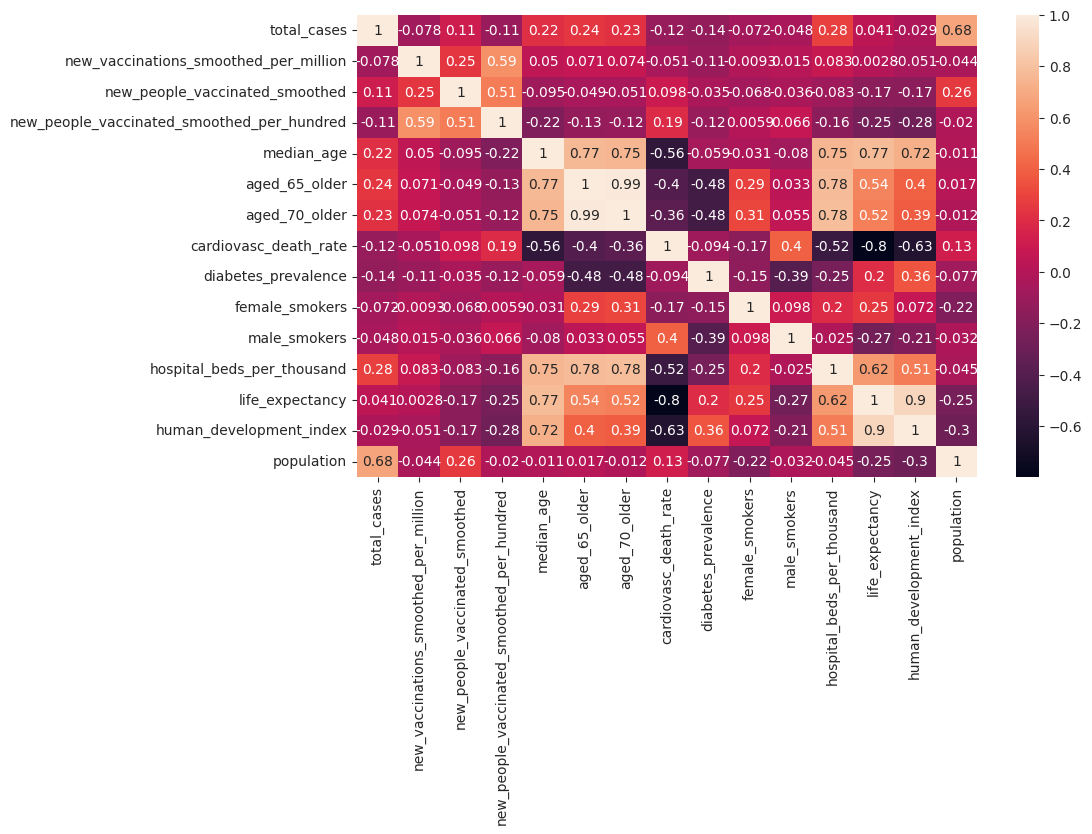

In [ ]:
#Korelasi

corr_df = df.corr()
plt.figure(figsize=(10,6))
sns.set_style('ticks')

sns.heatmap(corr_df,annot=True)
plt.show()

<ipython-input-497-43f447a57f4b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_cases'])


<Axes: xlabel='total_cases', ylabel='Density'>

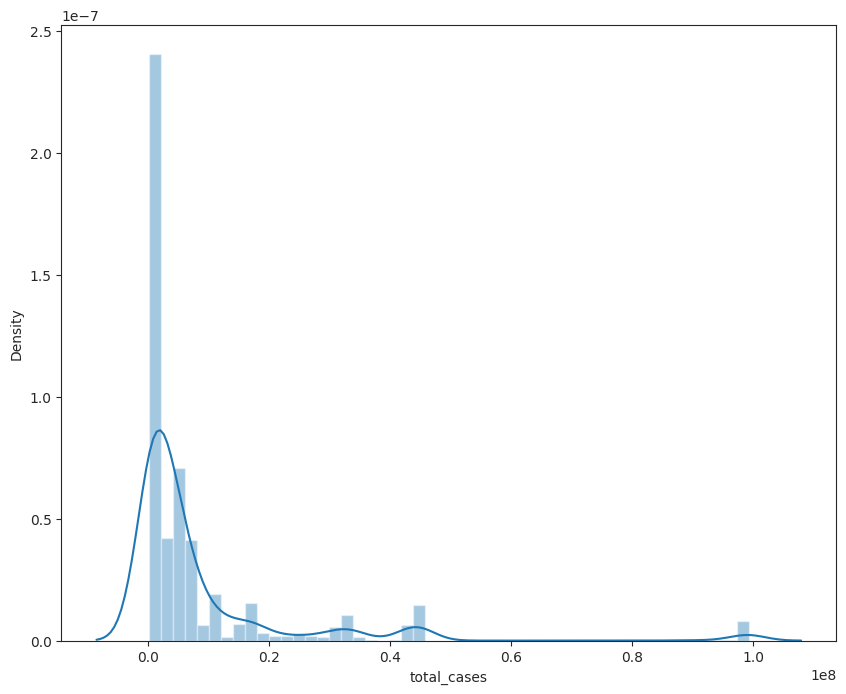

In [ ]:
#Normalitas
plt.figure(figsize=(10,8))
plt.tight_layout()
sns.distplot(df['total_cases'])

#Modelling



In [ ]:
X = df[['new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed',
        'median_age', 'aged_65_older', 'aged_70_older', 'cardiovasc_death_rate',
        'diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand',
        'life_expectancy', 'human_development_index', 'population']].values
y = df[['total_cases']].values

##Linear Regression

In [ ]:
# 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Training Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Nilai koefisien regresi slope (beta 1, 2, dst)
regressor.coef_[0]

array([-6.61619139e+02, -1.81575468e+00, -2.95212364e+03, -1.92085097e+06,
        2.50537584e+06, -1.73243398e+04, -3.46730416e+05,  4.30345623e+04,
       -3.13185908e+04,  1.39916527e+06, -1.86770439e+05,  1.14316645e+07,
        2.96016402e-02])

In [ ]:
#Dataframe koefisien regresi
X_columns = df[['new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed',
                'median_age', 'aged_65_older', 'aged_70_older', 'cardiovasc_death_rate',
                'diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand',
                'life_expectancy', 'human_development_index', 'population']].columns

coeff_df = pd.DataFrame(regressor.coef_[0], X_columns, columns=['Coefficient/Slope'])
coeff_df

,Coefficient/Slope
new_vaccinations_smoothed_per_million,-6.616191e+02
new_people_vaccinated_smoothed,-1.815755e+00
median_age,-2.952124e+03
aged_65_older,-1.920851e+06
aged_70_older,2.505376e+06
cardiovasc_death_rate,-1.732434e+04
diabetes_prevalence,-3.467304e+05
female_smokers,4.303456e+04
male_smokers,-3.131859e+04
hospital_beds_per_thousand,1.399165e+06


In [ ]:
#Nilai koefisien regresi intersep (beta 0)
regressor.intercept_[0]

17431205.71125657

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
#Menampilkan nilai prediksi
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(10)
df1

,Actual,Predicted
0,4817300.0,8.312210e+06
1,19882393.0,2.249051e+07
2,4067581.0,4.650535e+06
3,838375.0,-3.578610e+06
4,7561428.0,5.520866e+06
5,16851518.0,7.734582e+06
6,525171.0,4.487749e+06
7,6655686.0,4.483455e+07
8,829882.0,4.525753e+06
9,4918917.0,8.426344e+05


In [ ]:
#Mengukur nilai MAE, MSE, RMSE, R-square
print('Mean Absolute Error(MAE): ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE): ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', round(metrics.r2_score(y_test, y_pred), 2))

Mean Absolute Error(MAE):  4912310.190633993
Mean Squared Error(MSE):  109894236623597.55
Root Mean Squared Error(RMSE):  10483045.198013674
R2 Score: 0.61


In [ ]:
#Uji Signifikansi
X = sm.add_constant(X)  # Menambahkan kolom konstanta (intercept)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     572.2
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:27:41   Log-Likelihood:                -99557.
No. Observations:                5658   AIC:                         1.991e+05
Df Residuals:                    5644   BIC:                         1.992e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.354e+07    6.9e+06      1.963      0.0

##Decicision Tree Regressor

In [ ]:
# Initializing the Decision Tree Regression model
model_dtr = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model_dtr.fit(X_train, y_train)

# Predicting the target values of the test set
y_pred = model_dtr.predict(X_test)

# RMSE (Root Mean Square Error) dan RSquare
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 7081126808414.542
R-squared (R^2): 0.9745482510981003
Mean Absolute Error (MAE): 206602.62864600564


In [ ]:
#Kepentingan Fitur pada model
feature_importance = model_dtr.feature_importances_
for i, importance in enumerate(feature_importance):
    print(f"Fitur {i}: {importance}")

Fitur 0: 0.07179350072679748
Fitur 1: 0.2595249012493156
Fitur 2: 0.016376463232708315
Fitur 3: 0.008219856868713363
Fitur 4: 5.978106371878778e-08
Fitur 5: 0.022375509298011315
Fitur 6: 0.0030355067604528746
Fitur 7: 2.118921226288755e-05
Fitur 8: 3.893630720091082e-06
Fitur 9: 0.1059510657782262
Fitur 10: 2.2388269810261298e-05
Fitur 11: 0.05390063472650319
Fitur 12: 0.4587750304654147


In [ ]:
# Kepentingan fitur dalam model Decicision Tree
feature_importance = model_dtr.feature_importances_

# Menggabungkan indeks dan tingkat kepentingan
feature_importance_with_index = list(enumerate(feature_importance))

# Mengurutkan fitur berdasarkan tingkat kepentingan (dalam urutan menurun)
sorted_feature_importance = sorted(feature_importance_with_index, key=lambda x: x[1], reverse=True)

# Mencetak fitur yang telah diurutkan
for i, importance in sorted_feature_importance:
    print(f"Fitur {i}: {importance}")


Fitur 12: 0.4587750304654147
Fitur 1: 0.2595249012493156
Fitur 9: 0.1059510657782262
Fitur 0: 0.07179350072679748
Fitur 11: 0.05390063472650319
Fitur 5: 0.022375509298011315
Fitur 2: 0.016376463232708315
Fitur 3: 0.008219856868713363
Fitur 6: 0.0030355067604528746
Fitur 10: 2.2388269810261298e-05
Fitur 7: 2.118921226288755e-05
Fitur 8: 3.893630720091082e-06
Fitur 4: 5.978106371878778e-08


##Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initializing the Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=0)

# Fitting the Random Forest Regression model to the data
random_forest_model.fit(X_train, y_train)

# Predicting the target values of the test set using Random Forest
y_pred_random_forest = random_forest_model.predict(X_test)

# RMSE (Root Mean Square Error) and RSquare for Random Forest
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
mae = mean_absolute_error(y_test, y_pred)

print("\nRandom Forest Model:")
print(f"Mean Squared Error (MSE): {mse_random_forest}")
print(f"R-squared (R^2): {r2_random_forest}")
print(f"Mean Absolute Error (MAE): {mae}")

<ipython-input-511-170578009a17>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)



Random Forest Model:
Mean Squared Error (MSE): 6756370642226.597
R-squared (R^2): 0.9757155247001402
Mean Absolute Error (MAE): 206602.62864600564


In [ ]:
#Kepentingan Fitur pada model
feature_importance = random_forest_model.feature_importances_
for i, importance in enumerate(feature_importance):
    print(f"Fitur {i}: {importance}")

Fitur 0: 0.07243555401070477
Fitur 1: 0.2605880996142832
Fitur 2: 0.044618877487748135
Fitur 3: 0.013932477034013936
Fitur 4: 0.014631883064458572
Fitur 5: 0.045320504450828254
Fitur 6: 0.00437049406329724
Fitur 7: 0.0006561769508462542
Fitur 8: 0.008443585695915152
Fitur 9: 0.05329452906644582
Fitur 10: 0.00841034100042706
Fitur 11: 0.009222419200557204
Fitur 12: 0.4640750583604745


In [ ]:
# Kepentingan fitur dalam model Random Forest
feature_importance = random_forest_model.feature_importances_

# Menggabungkan indeks dan tingkat kepentingan
feature_importance_with_index = list(enumerate(feature_importance))

# Mengurutkan fitur berdasarkan tingkat kepentingan (dalam urutan menurun)
sorted_feature_importance = sorted(feature_importance_with_index, key=lambda x: x[1], reverse=True)

# Mencetak fitur yang telah diurutkan
for i, importance in sorted_feature_importance:
    print(f"Fitur {i}: {importance}")


Fitur 12: 0.4640750583604745
Fitur 1: 0.2605880996142832
Fitur 0: 0.07243555401070477
Fitur 9: 0.05329452906644582
Fitur 5: 0.045320504450828254
Fitur 2: 0.044618877487748135
Fitur 4: 0.014631883064458572
Fitur 3: 0.013932477034013936
Fitur 11: 0.009222419200557204
Fitur 8: 0.008443585695915152
Fitur 10: 0.00841034100042706
Fitur 6: 0.00437049406329724
Fitur 7: 0.0006561769508462542
